# Pyber Ride Sharing

Trend1: Urban cities have highest number of ride counts (68.4%) as well as driver counts (86%). Also these cities have the lowest
average fare. 
Trend2: A city in Rural area has the highest average dollar fare ($50) and the lowest number of rides (1).
Trend3: higher number of drivers will increade the number of rides and will eventually reduce the fare.

# Analysis


In [1]:
# import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read and load the city and ride data
ride_data = pd.read_csv("raw_data/ride_data.csv")
city_data = pd.read_csv("raw_data/city_data.csv")

#add up the duplicate row driver counts
grouped_city_data = city_data.groupby(['city','type']).sum()
new_city_data = grouped_city_data.reset_index()

# merge the city and ride data on city column
merged_data = pd.merge(ride_data, new_city_data, how = 'left', on = 'city').rename(columns={"type":"city_type"})
merged_data.head()

,city,date,fare,ride_id,city_type,driver_count
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,Urban,46
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,Urban,35
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,Urban,55
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,Urban,68
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,Urban,8


# Bubble Plot of Ride Sharing Data

In [2]:
# Calculate the average fare and total ride
avg_fare = merged_data.groupby(['city_type','city','driver_count']).mean()['fare']
total_ride = merged_data.groupby(['city_type','city','driver_count']).nunique()['ride_id']
# create a dataframe to have average fare and total ride count
ride_share = pd.DataFrame({"Average Fare ($)" : avg_fare, "Total Number of Rides": total_ride}).reset_index()

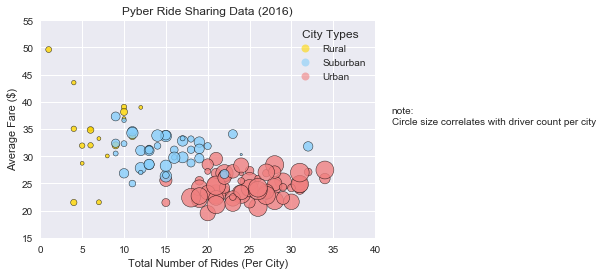

In [4]:
# filter the datafrane by the type of city
ride_share_urban = ride_share.loc[ride_share.city_type =="Urban",:]
ride_share_rural = ride_share.loc[ride_share.city_type =="Rural",:]
ride_share_suburban = ride_share.loc[ride_share.city_type =="Suburban",:]
city_type = ("Rural", "Suburban", "Urban")

# create three scatter plot for three types of city data
plt.scatter(ride_share_urban['Total Number of Rides'], 
            ride_share_urban['Average Fare ($)'], 
            s=5*ride_share_urban.driver_count, 
            c='LightCoral',
           edgecolors='black',
           linewidths = 0.5,
           alpha =0.8)
plt.scatter(ride_share_rural['Total Number of Rides'], 
            ride_share_rural['Average Fare ($)'], 
            s=5*ride_share_rural.driver_count, 
            c='Gold',
           edgecolors='black',
           linewidths = 0.5,
           alpha =0.8)
plt.scatter(ride_share_suburban['Total Number of Rides'], 
            ride_share_suburban['Average Fare ($)'], 
            s=5*ride_share_suburban.driver_count, 
            c='lightskyblue',
           edgecolors='black',
           linewidths = 0.5,
           alpha =0.8)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(0,40)
plt.ylim(15,55)
plt.grid(True)

# add a note next to the plot
plt.text(42,36, "note:\nCircle size correlates with driver count per city", fontsize=10)
# add a grey background to the plot
sns.set()
# add a legend to the plot
import matplotlib.lines as mlines
 
colors = ['Gold',
          'LightSkyBlue',
          'LightCoral']
legend = []
for step in range(len(colors)):
    legend.append(mlines.Line2D([0], [0],
                                        linestyle='none',
                                        marker='o',
                                        alpha=0.6,
                                        markersize=8,
                                        markerfacecolor=colors[step]))
 
plt.legend(legend,
           city_type,
            numpoints=1,
            fontsize=10,
            loc='best',
            title="City Types",
           shadow=True)



plt.show()

# Total Fares by City Type

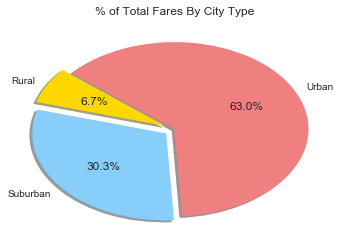

In [5]:
# Calculate the total fare
total_fare = merged_data.fare.sum()
# Grouping by city type to get the total fare by city type
total_fare_type = merged_data.groupby('city_type').sum()['fare']
fare_type_percent = (total_fare_type/total_fare)*100
# create the pie chart, defined explode, labels, colors and the percentage to show on the chart
explode = (0.08, 0.08, 0)
plt.pie(fare_type_percent,explode=explode,labels=city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares By City Type")
plt.show()

# Total Rides by City Type

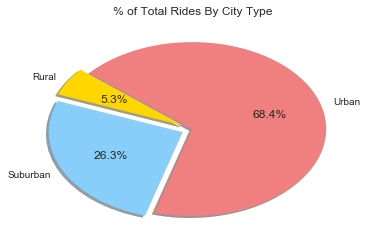

In [6]:
# Calculate the total ride count
total_ride = merged_data.ride_id.count()
# Grouping by city type to get the total ride by city type
ride_count_type = merged_data.groupby('city_type').count()['ride_id']
ride_type_percent = (ride_count_type/total_ride)*100
# create the pie chart, defined explode, labels, colors and the percentage to show on the chart
plt.pie(ride_type_percent,explode=explode,labels=city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides By City Type")
plt.show()

# Total Drivers by City Type

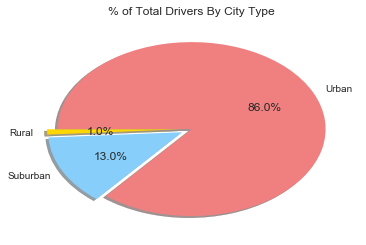

In [7]:
# Calculate the total driver count
total_driver = merged_data.driver_count.sum()
# Grouped by city type to get the total driver count by city type
driver_count_type = merged_data.groupby('city_type').sum()['driver_count']
driver_count_percent = 100*(driver_count_type/total_driver)
# create the pie chart, defined explode, labels, colors and the percentage to show on the chart
plt.pie(driver_count_percent,explode=explode,labels=city_type, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("% of Total Drivers By City Type")
plt.show()